In [17]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
df=pd.read_csv("fake_job_postings.csv")
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [20]:
# Keep required columns
df=df[["requirements","description","telecommuting","has_company_logo","has_questions","fraudulent"]]

In [21]:
df.head()

,requirements,description,telecommuting,has_company_logo,has_questions,fraudulent
0,Experience with content management systems a m...,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0
1,What we expect from you:Your key responsibilit...,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0
2,Implement pre-commissioning and commissioning ...,"Our client, located in Houston, is actively se...",0,1,0,0
3,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0
4,QUALIFICATIONS:RN license in the State of Texa...,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0


In [22]:
# Handle Missing Values
df["requirements"]=df["requirements"].fillna("")
df["description"]=df["description"].fillna("")

In [23]:
# Convert text to numeric
df["description_length"] = df["description"].apply(len)
df["requirements_length"] = df["requirements"].apply(len)

In [24]:
df.drop(["requirements","description"],axis=1,inplace=True)

In [25]:
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,description_length,requirements_length
0,0,1,0,0,905,852
1,0,1,0,0,2077,1433
2,0,1,0,0,355,1363
3,0,1,0,0,2600,1429
4,0,1,1,0,1520,757


In [26]:
# Feature and Target
X=df[["telecommuting","has_company_logo","has_questions","description_length","requirements_length"]]
y=df["fraudulent"]

In [28]:
# Scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [29]:
# Train-Test-Split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [30]:
# Model
model=LogisticRegression()
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
# Prediction
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [34]:
# Evaluation
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred,zero_division=1))

Accuracy: 0.9494780014914244

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5093
           1       1.00      0.00      0.00       271

    accuracy                           0.95      5364
   macro avg       0.97      0.50      0.49      5364
weighted avg       0.95      0.95      0.92      5364



<Axes: >

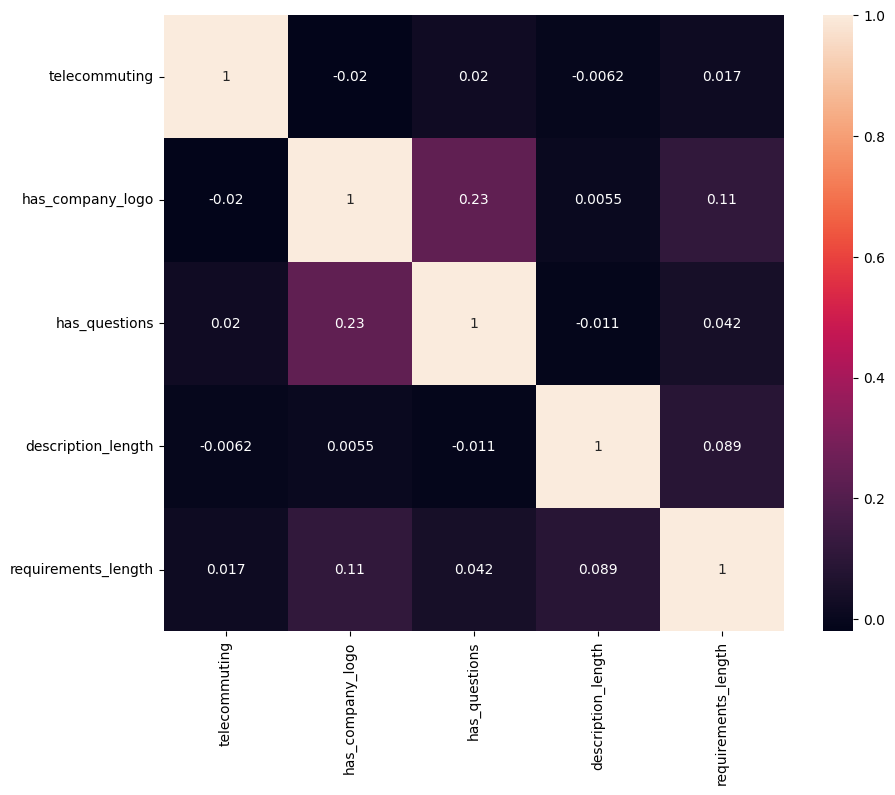

In [35]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(X.corr(),annot=True)